In [ ]:
# Import necessary libraries

# For data Analysis
import pandas as pd
import numpy as np


In [ ]:
# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data pre-processinger
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Classifier Libraries
import sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Classifier Libraries
import sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# !pip install xgboost
from xgboost import XGBClassifier  # Corrected capitalization
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Set Visualization
sns.set()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/sample_data/Jewelry_Dataset.csv")
df.columns =[
    "Order_Datetime",
    "Order_ID",
    "Product_ID",
    "SKU_Quantity",
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
    "Target_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem",
]

In [ ]:
df.head()

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1.920000e+18,1.810000e+18,1,1.810000e+18,NaN,NaN,212.14,1.520000e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1.930000e+18,1.840000e+18,1,1.810000e+18,jewelry.pendant,1.0,54.66,1.520000e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1.930000e+18,1.840000e+18,1,1.810000e+18,jewelry.pendant,0.0,88.90,1.520000e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1.930000e+18,1.870000e+18,1,1.810000e+18,jewelry.necklace,0.0,417.67,1.520000e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1.930000e+18,1.840000e+18,1,1.810000e+18,jewelry.earring,1.0,102.27,1.520000e+18,NaN,red,gold,NaN


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Order_Datetime,0
Order_ID,0
Product_ID,0
SKU_Quantity,0
Category_ID,5352
Category,9933
Brand_ID,4785
Price_USD,5352
User_ID,5352
Target_Gender,48167


In [ ]:
# Data shape
df.shape

(95910, 13)

In [ ]:
# Data description
df.describe()

,Order_ID,Product_ID,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485208e+18,1.818767e+18,1.0,1.809106e+18,8.914678e+16,362.213017,1.516588e+18
std,1.935179e+17,2.138354e+17,0.0,2.112894e+16,3.569121e+17,444.157665,2.430713e+16
min,1.920000e+18,1.310000e+18,1.0,1.310000e+18,0.000000e+00,0.990000,1.310000e+18
25%,2.380000e+18,1.520000e+18,1.0,1.810000e+18,0.000000e+00,145.620000,1.520000e+18
50%,2.520000e+18,1.960000e+18,1.0,1.810000e+18,1.000000e+00,258.770000,1.520000e+18
75%,2.640000e+18,1.960000e+18,1.0,1.810000e+18,1.000000e+00,431.370000,1.520000e+18
max,2.720000e+18,2.540000e+18,1.0,1.810000e+18,1.550000e+18,34448.600000,1.550000e+18


In [ ]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  float64
 2   Product_ID      95910 non-null  float64
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 9.5+ MB


In [ ]:
# Duplicate values
num_duplicated = len(df.loc[df.duplicated()])

In [ ]:
print(f"Number of duplicate records:", num_duplicated)

Number of duplicate records: 2956


In [ ]:
#Feature with a cardinality of 1 (invariant features)
invariant_features = df.nunique()[df.nunique() ==1].index.tolist()

In [ ]:
invariant_features

['SKU_Quantity']

In [ ]:
# Check for label distribution
df["Price_USD"].skew()

18.95906072625981

In [ ]:
# Price kurtosis
df["Price_USD"].kurtosis()

1054.8979068506155

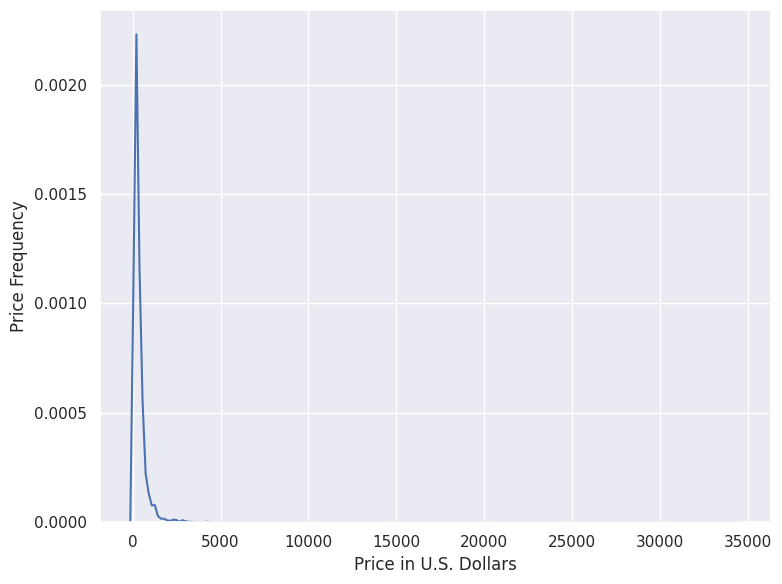

In [ ]:
# Visualize price distribution
plt.figure(figsize = (8,6))

sns.kdeplot(data = data, x = "Price_USD")

plt.xlabel("Price in U.S. Dollars")
plt.ylabel("Price Frequency")

plt.tight_layout()
plt.show(); plt.close()

OBSERVATIONS

The graph shows a frequency distribution of prices in U.S. dollars, revealing a highly skewed distribution. Most of the prices are concentrated at the lower end, while very few prices extend to higher ranges. This suggests that the majority of items are priced affordably, while a small proportion have significantly higher prices, possibly outliers or premium offerings.


In [ ]:
#Target gender analysis
df["Target_Gender"].value_counts()

,count
Target_Gender,
f,47379
m,364


In [ ]:
#Target gender analysis
df["Target_Gender"].value_counts(normalize = True)

,proportion
Target_Gender,
f,0.992376
m,0.007624


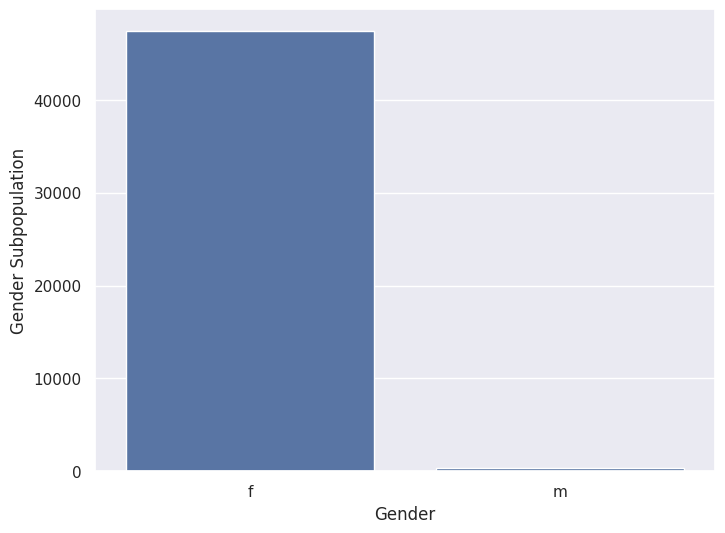

In [ ]:
# Visualize target
plt.figure(figsize = (8,6))

sns.countplot(data = data, x = "Target_Gender")

plt.xlabel("Gender")
plt.ylabel("Gender Subpopulation")

plt.show(); plt.close()

In [ ]:
# Jewelry category analysis
df["Category"].value_counts()

,count
Category,
jewelry.earring,29051
jewelry.ring,28300
jewelry.pendant,13088
jewelry.bracelet,6188
0,4392
...,...
228.59,1
130.41,1
166.03,1


In [ ]:
df["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.9', '380.1', '357.49', '15.47', '135.33', '719.75',
       '93.01', '177.95', 'jewelry.stud', '102.1', '595.75', '469.56',
       '427.07', '53.62', '77.53', '1469.18', '355.27', '184.89',
       '154.66', '300.58', '83.73', '271.19', '3294.21', '278.04',
       '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22', '124.88',
       '89.73', '171.23', '136.93', '19.04', '158.77', '187.1', '151.92',
       '1845.89', '87.23', '248.58', '596.48', '208.88', '193.11',
       '169.84', '1447.68', '45.07', '136.85', '282.05', '61.51',
       '210.21', '137.12', '1

In [ ]:
# Extract the actual categories
categories = df["Category"].unique().tolist()
categories = [c for c in categories if isinstance(c, str)and "jewelry" in c]

In [ ]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [ ]:
# Pick out authentic data based on categories
real_categories = df.loc[df["Category"].isin(categories)]

In [ ]:
# Percentage of missing values
100*df.isnull().sum() / len(df)

,0
Order_Datetime,0.000000
Order_ID,0.000000
Product_ID,0.000000
SKU_Quantity,0.000000
Category_ID,5.580231
Category,10.356584
Brand_ID,4.989052
Price_USD,5.580231
User_ID,5.580231
Target_Gender,50.221041


In [ ]:
# Percentage of missing values
100 * real_categories.isnull().sum() / len(real_categories)

,0
Order_Datetime,0.000000
Order_ID,0.000000
Product_ID,0.000000
SKU_Quantity,0.000000
Category_ID,0.000000
Category,0.000000
Brand_ID,4.309081
Price_USD,0.000000
User_ID,0.000000
Target_Gender,44.842029


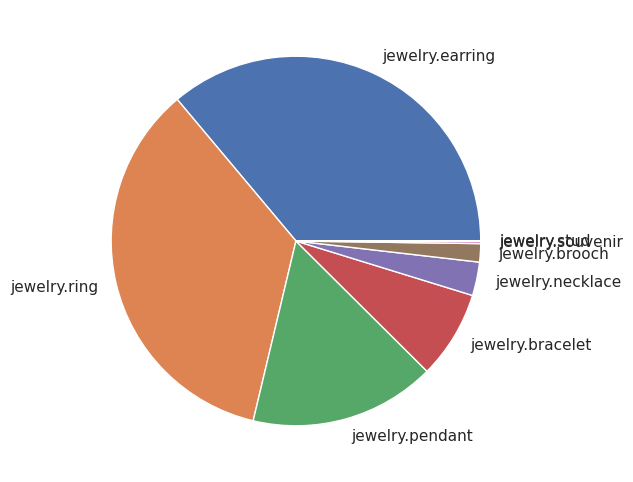

In [ ]:
# Visualize jewellry categories
subdata = real_categories["Category"].value_counts()


jewelry_categories, counts = subdata.index.tolist(),subdata.values.tolist()

plt.figure(figsize = (8,6))

plt.pie(x = counts, labels = jewelry_categories)

plt.show(); plt.close()

OBSERVATION AND NARRATIONS

The pie chart displays the distribution of various jewelry categories within a dataset. The following observations can be made:

Major Categories:

Earrings and Rings dominate the distribution, collectively accounting for the majority of the jewelry items. This indicates that these are the most popular or frequently occurring categories. Secondary Categories:

Pendants and Bracelets form the next significant portions, suggesting moderate popularity compared to earrings and rings. Minor Categories:

Necklaces, Brooches, Studs, and Souvenirs make up a much smaller fraction of the total, indicating niche demand or limited inventory. Management Implications: Focus Areas: Resources and marketing efforts should prioritize earrings and rings, as they are the primary contributors to sales or inventory. Growth Opportunities: Consider strategies to increase the visibility and sales of the smaller categories, such as targeted promotions or bundling with popular items. Inventory Planning: Maintain adequate stock for earrings and rings while ensuring smaller categories are available to meet diverse customer preferences.

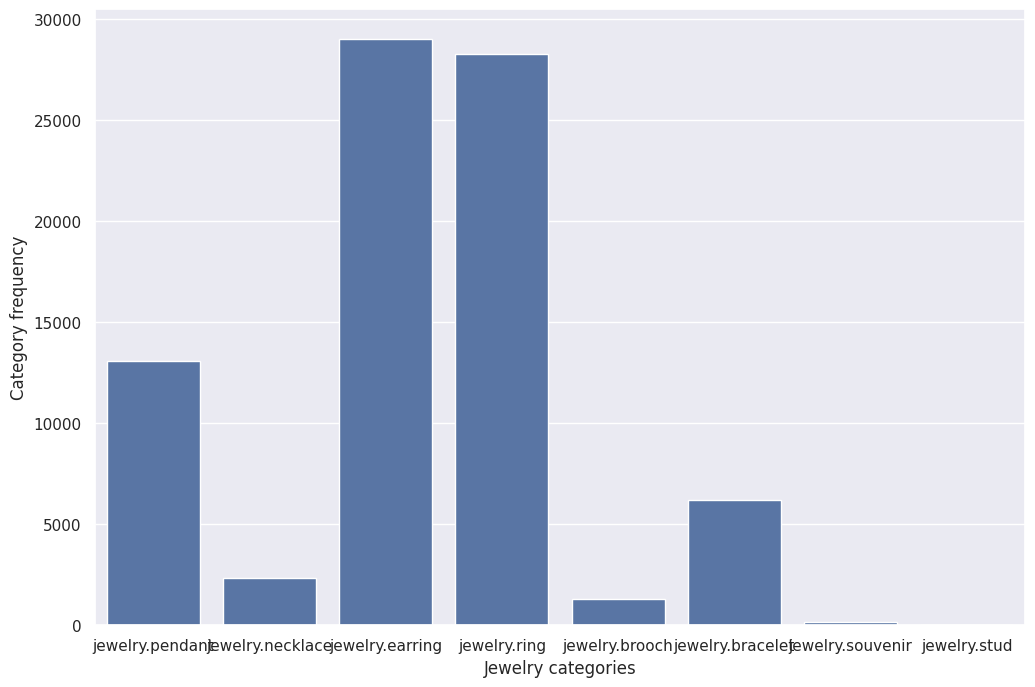

In [ ]:
# Category count plot
plt.figure(figsize = (12,8))

sns.countplot(data = real_categories, x ="Category")

plt.xlabel("Jewelry categories")
plt.ylabel("Category frequency")
plt.show(); plt.close()

OBSERVATIONS AND NARRATIONS

The bar chart illustrates the frequency distribution of various jewelry categories, providing insights into the popularity or availability of each type. The observations are as follows:

Observations: High-Frequency Categories:

Earrings and Rings are the most frequent jewelry categories, with nearly equal frequencies, both surpassing 25,000. These are clearly the most dominant categories in the dataset. Moderate-Frequency Categories:

Pendants and Bracelets follow, with pendants having a slightly higher frequency than bracelets, both being significant contributors to the dataset. Low-Frequency Categories:

Necklaces, Brooches, Souvenirs, and Studs are the least frequent categories, with frequencies far lower than the dominant groups. Among these, necklaces have a slightly higher frequency than the others. Narration to Management: The data reveals a clear dominance of earrings and rings, highlighting their popularity or abundance in the inventory. Pendants and bracelets also show notable presence, indicating moderate demand or inventory allocation. The remaining categories, including necklaces, brooches, souvenirs, and studs, represent niche products with much lower frequencies.

Recommendations: Inventory Management:

Maintain a strong focus on earrings and rings to cater to their high demand. Ensure sufficient stock for pendants and bracelets to meet consistent but moderate demand. Consider evaluating the demand for low-frequency categories (e.g., necklaces, brooches) and adjusting inventory accordingly to avoid overstocking. Marketing Strategy:

Invest in promotional campaigns for high-frequency categories to sustain and enhance their sales. Develop strategies to boost the visibility and appeal of low-frequency categories, such as bundling them with popular items or targeting niche customer groups. Customer Analysis:

Conduct further analysis to understand why certain categories dominate and identify customer preferences that could help in product diversification or refinement.

In [ ]:
#Gender skew in orginal data
df["Target_Gender"].value_counts(normalize = True)

,proportion
Target_Gender,
f,0.992376
m,0.007624


In [ ]:
#Gender skew in orginal data
real_categories["Target_Gender"].value_counts(normalize = True)

,proportion
Target_Gender,
f,0.994434
m,0.005566


In [ ]:
# Encode gender
encoded,category_code = pd.factorize(real_categories["Category"])
real_categories.loc[:, "Category"] = encoded

In [ ]:
# Encode jewelry categories
encoded,category_code = pd.factorize(real_categories["Target_Gender"])
real_categories.loc[:, "Target_Gender"] = encoded

In [ ]:
# Encode jewelry categories
encoded,category_code = pd.factorize(real_categories["Main_Gem"])
real_categories.loc[:, "Main_Gem"] = encoded

In [ ]:
# Encode color
encoded,category_code = pd.factorize(real_categories["Main_Color"])
real_categories.loc[:, "Main_Color"] = encoded

In [ ]:
# Encode jewelry categories
encoded,category_code = pd.factorize(real_categories["Main_Metal"])
real_categories.loc[:, "Main_Metal"] = encoded

In [ ]:
real_categories.head()

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1.930000e+18,1.840000e+18,1,1.810000e+18,0,1.0,54.66,1.520000e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1.930000e+18,1.840000e+18,1,1.810000e+18,0,0.0,88.90,1.520000e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1.930000e+18,1.870000e+18,1,1.810000e+18,1,0.0,417.67,1.520000e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1.930000e+18,1.840000e+18,1,1.810000e+18,2,1.0,102.27,1.520000e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1.930000e+18,1.600000e+18,1,1.810000e+18,2,0.0,150.55,1.520000e+18,-1,1,0,1


In [ ]:
real_categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80458 entries, 1 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  80458 non-null  object 
 1   Order_ID        80458 non-null  float64
 2   Product_ID      80458 non-null  float64
 3   SKU_Quantity    80458 non-null  int64  
 4   Category_ID     80458 non-null  float64
 5   Category        80458 non-null  object 
 6   Brand_ID        76991 non-null  float64
 7   Price_USD       80458 non-null  float64
 8   User_ID         80458 non-null  float64
 9   Target_Gender   80458 non-null  object 
 10  Main_Color      80458 non-null  object 
 11  Main_Metal      80458 non-null  object 
 12  Main_Gem        80458 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 10.6+ MB


In [ ]:
# Feature correlation
correlations = real_categories.drop(labels = ["Order_Datetime", "User_ID", "Order_ID", "Product_ID"], axis= 1).corr(method = "spearman")

In [ ]:
correlations

,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,0.022894,-0.012950,0.027919,0.040773,0.051492,0.185724,0.035895
Category,NaN,0.022894,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,-0.012950,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_USD,NaN,0.027919,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_Gender,NaN,0.040773,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,NaN,0.051492,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_Metal,NaN,0.185724,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_Gem,NaN,0.035895,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


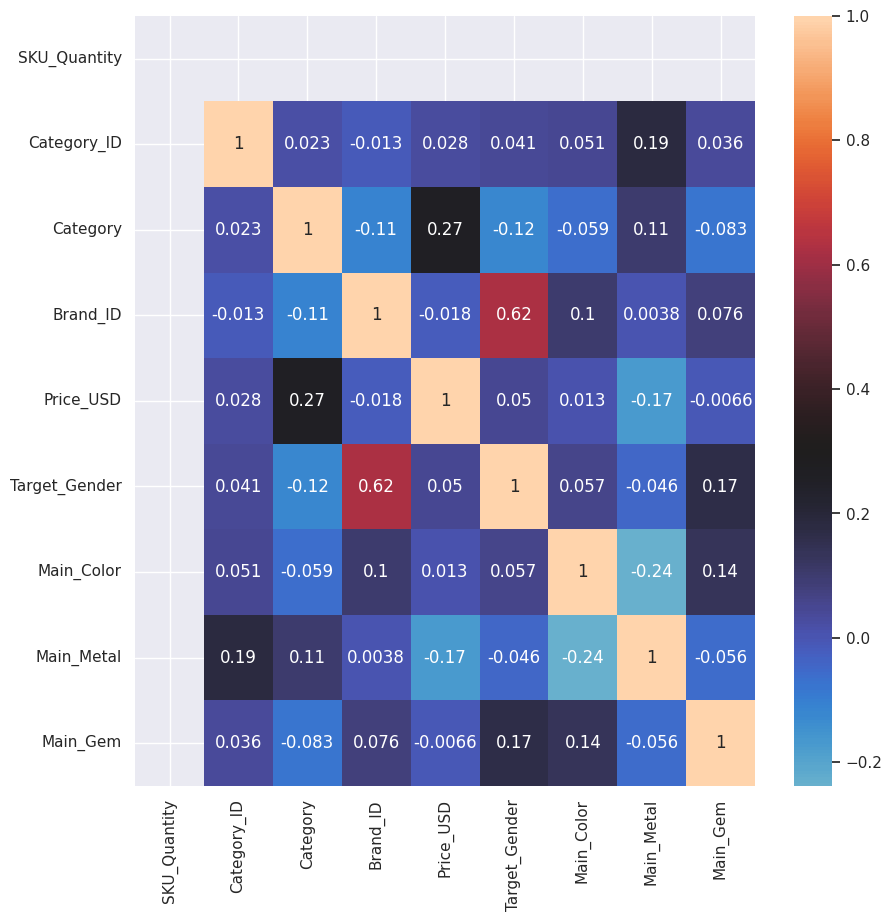

In [ ]:
# Correlation heatmap
plt.figure(figsize = (10,10))

sns.heatmap(correlations, annot = True, center = .3)
plt.show(); plt.close()



High Correlation:

Target_Gender and Brand_ID have a strong positive correlation of 0.62.
Category and Price_USD show a moderate positive correlation of 0.27.
Low or Negative Correlation:

Main_Metal and Main_Color show a slight negative correlation of -0.24.
Category_ID and most features have near-zero correlation, indicating limited direct relationships.
Diagonal Values:

As expected, the diagonal values are 1, representing perfect correlation with themselves.
Color Coding:

Positive correlations are represented in shades closer to orange, while negative correlations are in shades of blue/purple.

In [ ]:
# Set correlation limits
upper = 1
lower = .1

In [ ]:
# Explicitly obtain correlated features
Correlated_columns={
     column:correlations[(correlations[column] > lower) &(upper >correlations[column])].index.tolist()
     for column in correlations.columns
 }

In [ ]:
Correlated_columns

{'SKU_Quantity': [],
 'Category_ID': ['Main_Metal'],
 'Category': ['Price_USD', 'Main_Metal'],
 'Brand_ID': ['Target_Gender', 'Main_Color'],
 'Price_USD': ['Category'],
 'Target_Gender': ['Brand_ID', 'Main_Gem'],
 'Main_Color': ['Brand_ID', 'Main_Gem'],
 'Main_Metal': ['Category_ID', 'Category'],
 'Main_Gem': ['Target_Gender', 'Main_Color']}

In [ ]:
# Columns to eliminate
columns_to_eliminate = [
    "SKU_Quantity",
    "Order_ID",
    "Product_ID",
    "User_ID",
    "Category_ID"
]

# Eliminate unused features
df.drop(labels=columns_to_eliminate, axis=1, inplace=True)

In [ ]:
# Eliminate unused features
df.drop(labels=["Order_Datetime"], axis=1, inplace=True)

In [ ]:
df.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [ ]:
# Eliminate unrealistic categories
df = df.loc[df["Category"].isin(categories), :]

In [ ]:

df.shape

(80458, 7)

In [ ]:
# Seperate features from labels
X, y = df.drop(labels = ["Price_USD"], axis = 1), df["Price_USD"]

In [ ]:
#split the dataset into training and testing set - X= questions, y = Answers
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2,random_state=42)

04. DATA MODELLING


1. LINEAR REGRESSION

2. EXTREMELY RANDOM FOREST (EXTRATREES)

3. ADAPTIVE BOOSTING(ADABOOST), AND

4. CATBOOST

ENCODE CATEGORICAL FEATURES(IF REQUIRED).
ACCOUNT FOR TARGET SKEW.
FIX MISSING VALUES

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

def generate_pipeline(model, column_indices, categorical_indices, fill_missing=True, one_hot=True, label_encode=False):
    # Transformer to handle missing values
    first_transformer = ColumnTransformer(
        transformers=[
            ("imputer", SimpleImputer(strategy="most_frequent"), column_indices)
        ],
        remainder="passthrough",
        sparse_threshold=0.0
    )

    # Transformer for one-hot encoding
    second_transformer = ColumnTransformer(
        transformers=[
            ("one_hot", OneHotEncoder(), categorical_indices)
        ],
        remainder="passthrough",
        sparse_threshold=0.0
    )

    # Transformer for ordinal encoding
    third_transformer = ColumnTransformer(
        transformers=[
            ("ordinal", OrdinalEncoder(), categorical_indices)
        ],
        remainder="passthrough",
        sparse_threshold=0.0
    )

    # Steps for the pipeline
    steps = []

    if fill_missing:
        steps.append(("first", first_transformer))
    if label_encode:
        steps.append(("third", third_transformer))
    if one_hot:
        steps.append(("second", second_transformer))

    # Wrap the model with TransformedTargetRegressor for target transformation
    model = TransformedTargetRegressor(regressor=model, transformer=PowerTransformer(method="yeo-johnson"))

    # Add the model as the final step
    steps.append(("model", model))

    # Create and return the pipeline
    model_pipe = Pipeline(steps=steps)
    return model_pipe

# ... (rest of your code) ...

In [ ]:
# Generate indices
columns = X.columns.tolist()

column_indices = [columns.index(c) for c in columns]
categorical_features = [c for c in columns if c not in ["Brand_ID"]]
categorical_indices = [ columns.index(c) for c in categorical_features]

In [ ]:
categorical_indices

[0, 2, 3, 4, 5]

In [ ]:
from sklearn.preprocessing import PowerTransformer

# transform target - this is done BEFORE fitting any of the pipes
cat_pipe = TransformedTargetRegressor(regressor=cat_pipe, transformer=PowerTransformer(method="yeo-johnson"))
ada_pipe = TransformedTargetRegressor(regressor=ada_pipe, transformer=PowerTransformer(method="yeo-johnson"))
lin_pipe = TransformedTargetRegressor(regressor=lin_pipe, transformer=PowerTransformer(method="yeo-johnson"))
extra_pipe = TransformedTargetRegressor(regressor=extra_pipe, transformer=PowerTransformer(method="yeo-johnson")) #typo here

In [ ]:
from catboost import CatBoostRegressor

# catBoost pipeline
cat_pipe = generate_pipeline(
    model=CatBoostRegressor(loss_function="RMSE", iterations=10000, learning_rate=0.1, one_hot_max_size=2),
    column_indices=column_indices,
    categorical_indices=categorical_indices,
    fill_missing=False,
    one_hot=False,
    label_encode=True  # Fixed typo from `labell_encode`
)


In [ ]:
# LR pipeline
Lin_pipe = generate_pipeline(
    LinearRegression(),
    column_indices=column_indices,
    categorical_indices=categorical_indices,
    fill_missing=False,
    one_hot=False,
    label_encode=False  # Fixed typo from `labell_encode`
)


In [ ]:
# AdaBoost pipeline
ada_pipe = generate_pipeline(
    model=AdaBoostRegressor(loss = "exponential", n_estimators = 1000, learning_rate=.01),
    column_indices=column_indices,
    categorical_indices=categorical_indices,
    fill_missing=True,
    one_hot=True,
    label_encode=False  # Fixed typo from `labell_encode`
)


In [ ]:
# Extratrees pipeline
extra_pipe = generate_pipeline(
    model=ExtraTreesRegressor(criterion = "friedman_mse", n_estimators = 1000, bootstrap=True),
    column_indices=column_indices,
    categorical_indices=categorical_indices,
    fill_missing=True,
    one_hot=True,
    label_encode= False  # Fixed typo from `labell_encode`
)


In [ ]:
# ipython-input-81-5221a81776d9
# Extratrees pipeline
extra_pipe = generate_pipeline(
    model=ExtraTreesRegressor(criterion = "friedman_mse", n_estimators = 1000, bootstrap=True),
    column_indices=column_indices,
    categorical_indices=categorical_indices,
    fill_missing=True,
    one_hot=True,
    label_encode= False  # Fixed typo from `labell_encode`
)

In [ ]:
# ipython-input-82-5221a81776d9
# catBoost pipeline
cat_pipe = generate_pipeline(
    model=CatBoostRegressor(loss_function="RMSE", iterations=10000, learning_rate=0.1, one_hot_max_size=2),
    column_indices=column_indices,
    categorical_indices=categorical_indices,
    fill_missing=False,
    one_hot=False,
    label_encode=True  # Fixed typo from `labell_encode`
)

In [ ]:
# Fit Extratree
extra_pipe.fit(X_train, y_train)


Pipeline(steps=[('first',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('second',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  [0, 2, 3, 4, 5])])),
                ('model',
                 ExtraTreesRegressor(bootstrap=True, criterion='friedman_mse',
                                     n_estimators=1000))])

In [ ]:
from sklearn.preprocessing import LabelEncoder

#label Encoding

encoder = LabelEncoder() # method initialization

#looping for columns except survived
for c in df.columns[1:]:
  if (df[c].dtype == 'object'):
    df[c] = encoder.fit_transform(df[c]) # Change data to df

  else:
    df[c] = df[c]

df.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,jewelry.pendant,1.0,54.66,0,2,0,23
2,jewelry.pendant,0.0,88.90,0,0,0,8
3,jewelry.necklace,0.0,417.67,2,0,0,2
4,jewelry.earring,1.0,102.27,2,0,0,30
5,jewelry.earring,0.0,150.55,2,0,0,8


In [149]:
# Check if 'Category' column exists before dropping
if 'Category' in df.columns:
    df.drop('Category', axis=1, inplace=True)

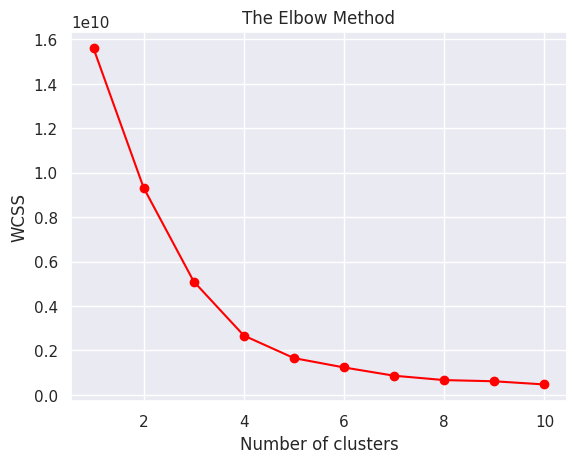

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Before applying KMeans, impute missing values
imputer = SimpleImputer(strategy='mean') # or 'median', 'most_frequent'
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Determine optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_imputed) # Use the imputed DataFrame
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, color='red', marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Observations for Management:
Objective:

The chart helps identify the optimal number of clusters for segmenting data effectively while balancing the trade-off between model simplicity and accuracy.
Key Metric (WCSS):

WCSS (Within-Cluster Sum of Squares) measures the variance within each cluster.
A lower WCSS indicates tighter and more compact clusters.
Trend Analysis:

As the number of clusters increases, WCSS decreases, signifying improved clustering.
However, the rate of decrease significantly diminishes after a certain point, forming an "elbow" shape.
Optimal Number of Clusters:

The "elbow" point, where the WCSS curve starts flattening, is observed at 4 clusters.
Adding more clusters beyond this point provides minimal benefit while increasing model complexity.
Recommendation:

Based on the analysis, a clustering model with 4 clusters is optimal for the data, ensuring a balance between accuracy and efficiency.
Actionable Insights:
Use these clusters for segmentation, targeting, or pattern discovery.
Share this analysis with teams to align on the optimal segmentation strategy.

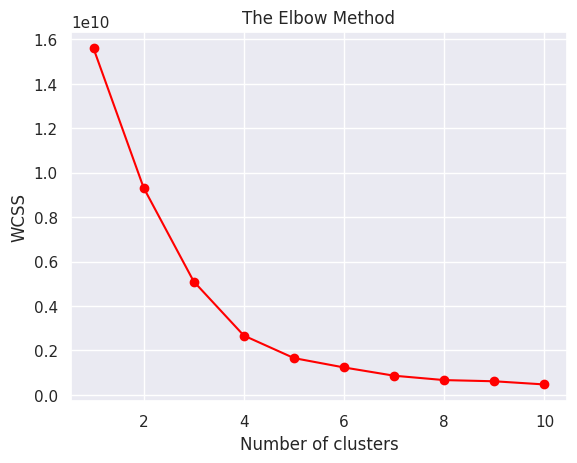

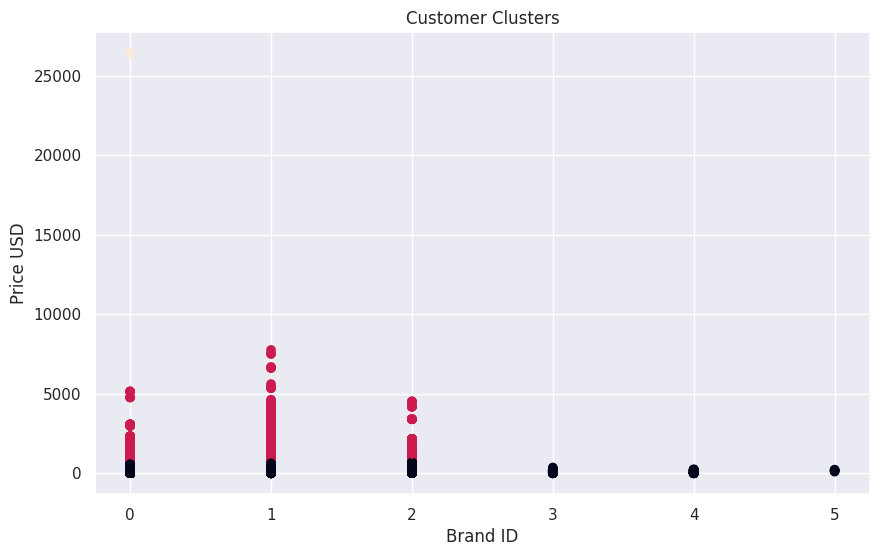

Silhouette Score: 0.753918919973895


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the jewelry data
# ... (Your existing code for data loading and preprocessing) ...

# Select the features for clustering
features = ['Brand_ID', 'Price_USD', 'Target_Gender', 'Main_Color', 'Main_Metal', 'Main_Gem']
data_for_clustering = df[features]

# Before applying KMeans, impute missing values
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
data_imputed = pd.DataFrame(imputer.fit_transform(data_for_clustering), columns=features)

# Determine optimal number of clusters (if not already done)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_imputed) # Use the imputed DataFrame
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, color='red', marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters based on the elbow method (e.g., 3 in this case)
optimal_num_clusters = 3  # Update with the value you choose from the elbow plot

# Apply KMeans with the determined number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
kmeans.fit(data_imputed)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Visualize cluster results (using two features for visualization)
plt.figure(figsize=(10, 6))
plt.scatter(df['Brand_ID'], df['Price_USD'], c=df['Cluster'], label='centroids')  # Choose two features for visualization
plt.title('Customer Clusters')
plt.xlabel('Brand ID')  # Update x-axis label
plt.ylabel('Price USD')  # Update y-axis label
plt.show()

# Calculate silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_imputed, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Observations and Narration for Management:
Objective:

The chart visualizes Customer Clusters based on the relationship between Brand ID and Price (USD). It aims to show how customers are segmented by brand preferences and spending patterns.
Key Observations:

Cluster Distribution:
The data points are grouped into clusters along different Brand IDs (0 to 5).
This indicates segmentation of customers based on their preferred brands.
Price Range Variability:
A wide range of prices is observed for some clusters (e.g., Brand IDs 1 and 2), indicating significant variability in customer spending habits within these brands.
For other brands (e.g., 3, 4, and 5), spending is concentrated at lower price points, suggesting a more uniform or budget-focused customer base.
Outliers:
There are a few extreme outliers, particularly for Brand ID 0 and 1, with very high prices (above $20,000), indicating premium purchases or a niche high-spending customer segment.
Insights:

Brand 0 and 1: Likely target high-income customers or customers purchasing premium products, given the high-price outliers.
Brands 3, 4, and 5: Seem to cater to budget-conscious customers, as spending remains at lower levels with no significant outliers.
Brand 2: Displays a mix, with mid-range to high-spending customers, indicating potential as a mass-market brand with occasional premium product buyers.
Recommendations for Management:

Premium Strategies: Focus on upselling or exclusive offerings for high-spending customers in Brands 0 and 1.
Budget Branding: Strengthen price-sensitive marketing strategies for Brands 3, 4, and 5 to attract more budget-conscious customers.
Mid-Range Positioning: Leverage the diversity of Brand 2 to appeal to both budget and premium segments, possibly through differentiated product lines.
Actionable Steps:

Conduct deeper demographic or behavioral analysis within each cluster to better understand customer needs.
Align product and pricing strategies for each brand based on the spending behaviors observed.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer


# Assuming 'df' is your DataFrame with the jewelry data

# Select features and target variable
features = ['Brand_ID', 'Target_Gender', 'Main_Color', 'Main_Metal', 'Main_Gem']
target = 'Price_USD'
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # or 'median', 'most_frequent'
X_train = imputer.fit_transform(X_train) # Fit and transform on training data
X_test = imputer.transform(X_test) # Transform testing data using the trained imputer


# 1. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# 2. Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate models
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R-squared:", r2_score(y_test, y_pred_lin))

print("\nRandom Forest Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))

Linear Regression:
MSE: 165210.21181248006
R-squared: 0.05209470454132081

Random Forest Regression:
MSE: 130451.55385693273
R-squared: 0.25152496722083006


Observations and Narration for Management:
Objective:

The performance of two regression models, Linear Regression and Random Forest Regression, has been evaluated to predict the target variable based on the given dataset. Metrics such as Mean Squared Error (MSE) and R-squared are used for comparison.
Key Observations:

Linear Regression:
MSE: 165,210.21 (higher error, indicating less accurate predictions).
R-squared: 0.0521 (very low, suggesting the model explains only ~5.2% of the variance in the target variable).
This indicates Linear Regression has limited predictive power for this dataset, possibly due to non-linear relationships or interactions in the data that the model cannot capture.
Random Forest Regression:
MSE: 130,451.55 (lower error, indicating more accurate predictions).
R-squared: 0.2515 (higher, explaining ~25.2% of the variance in the target variable).
Random Forest outperforms Linear Regression, likely because it captures non-linear relationships and complex interactions in the data.
Insights:

Linear Regression: Performs poorly, suggesting that the dataset is not well-suited for a simple linear approach. The low R-squared implies that the model is unable to capture key patterns in the data.
Random Forest Regression: Performs better, reducing error by ~21% (lower MSE) and explaining 20% more of the variance (higher R-squared). This model is better suited for the dataset due to its ability to handle non-linearities and interactions.
Recommendations for Management:

Adopt Random Forest Regression as the primary model for predictions since it outperforms Linear Regression significantly in terms of both accuracy (MSE) and explanatory power (R-squared).
Feature Engineering: Consider refining input features through transformations, interactions, or selection to improve model performance further.
Model Evaluation: Continue exploring other advanced algorithms (e.g., Gradient Boosting, XGBoost) to potentially improve performance even more.
Data Quality: Review the dataset for noise, missing values, or uninformative features that may be limiting performance.
Actionable Steps:

Finalize the Random Forest model for deployment or further testing.
Conduct feature importance analysis from the Random Forest model to understand which variables are most impactful and optimize the data pipeline.